# 1. Topology

- Topologies define the available hardware of a datacenter

- Defined using JSON format

- In this demo we compare two topologies
    - [Small](topologies/small_topology.json)
    - [Large](topologies/large_topology.json)
    - [Greenifier](topologies/greenifier_topology.json)

# 2. Workloads

- Workload traces are a recording of the tasks executed on a system 

- Graph Greenifier requires two different traces:
    - **tasks.parquet** provides a general overview of the tasks executed during the workload.
    - **fragments.parquet** provides detailed information of each task during its runtime 

In [25]:
import pandas as pd

df_tasks = pd.read_parquet("workload_traces/bitbrains-small/tasks.parquet")
df_fragments = pd.read_parquet("workload_traces/bitbrains-small/fragments.parquet")

In [26]:
df_tasks.head()

,id,submission_time,duration,cpu_count,cpu_capacity,mem_capacity
0,1019,2013-08-12 13:35:46,2592252000,1,2926.000135,181352
1,1023,2013-08-12 13:35:46,2592252000,1,2925.999560,260096
2,1026,2013-08-12 13:35:46,2592252000,1,2925.999717,249972
3,1052,2013-08-29 14:38:12,577855000,1,2926.000107,131245
4,1073,2013-08-21 11:07:12,1823566000,1,2599.999649,179306


In [27]:
df_fragments.head()

,id,duration,cpu_count,cpu_usage
0,1019,300000,1,0.000000
1,1019,300000,1,11.703998
2,1019,600000,1,0.000000
3,1019,300000,1,11.703998
4,1019,900000,1,0.000000


# 4. Scenario

- A scenario defines what the Graph Greenifier should run, and how.

- Scenarios are defined using a JSON format

- [bitbrains scenario](scenarios/bitbrains_scenario.json)
- [greenifier scenario](scenarios/greenifier_scenario.json)

- Parameters are defined as lists, this makes it easy to run multiple experiments

# 5. Running Greenifier

- Graph Greenifier is a terminal tool which can run directly. 
- Only a scenario is needed 

In [80]:
import subprocess

pathToScenario = "experiments/simple_experiment.json"
subprocess.run(["bin/OpenDCExperimentRunner", "--experiment-path", pathToScenario])



 Running scenario: 0 


Simulating...   0% [                                       ] 0/1 (0:00:00 / ?) 

14:07:42.517 [WARN ] org.opendc.compute.simulator.telemetry.ComputeMetricReader - 
					Metrics after 833 hours:
						Tasks Total: 50
						Tasks Active: 2
						Tasks Pending: 40
						Tasks Completed: 8
						Tasks Terminated: 0

14:07:42.547 [WARN ] org.opendc.compute.simulator.telemetry.ComputeMetricReader - 
					Metrics after 1666 hours:
						Tasks Total: 50
						Tasks Active: 1
						Tasks Pending: 39
						Tasks Completed: 10
						Tasks Terminated: 0

14:07:42.579 [WARN ] org.opendc.compute.simulator.telemetry.ComputeMetricReader - 
					Metrics after 2500 hours:
						Tasks Total: 50
						Tasks Active: 1
						Tasks Pending: 38
						Tasks Completed: 11
						Tasks Terminated: 0

14:07:42.631 [WARN ] org.opendc.compute.simulator.telemetry.ComputeMetricReader - 
					Metrics after 3333 hours:
						Tasks Total: 50
						Tasks Active: 1
						Tasks Pending: 37
						Tasks Completed: 12
						Tasks Terminated: 0

14:07:42.662 [WARN ] org.opendc.compute.simulator.telemetry.Co

Simulating... 100% [=================================] 1/1 (0:00:01 / 0:00:00) 
Simulating...   0% [                                       ] 0/1 (0:00:00 / ?) 

14:07:43.974 [WARN ] org.opendc.compute.simulator.telemetry.ComputeMetricReader - 
					Metrics after 833 hours:
						Tasks Total: 50
						Tasks Active: 20
						Tasks Pending: 0
						Tasks Completed: 30
						Tasks Terminated: 0



Simulating... 100% [=================================] 1/1 (0:00:00 / 0:00:00) 


CompletedProcess(args=['bin/OpenDCExperimentRunner', '--experiment-path', 'experiments/simple_experiment.json'], returncode=0)

## 6. Output

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pathToOutput = "output/simple"

df_host_small = pd.read_parquet("output/simple/raw-output/0/seed=0/host.parquet")
df_task_small = pd.read_parquet("output/simple/raw-output/0/seed=0/task.parquet")
df_power_small = pd.read_parquet("output/simple/raw-output/0/seed=0/powerSource.parquet")
df_service_small = pd.read_parquet("output/simple/raw-output/0/seed=0/service.parquet")

df_host_big = pd.read_parquet("output/simple/raw-output/1/seed=0/host.parquet")
df_task_big = pd.read_parquet("output/simple/raw-output/1/seed=0/task.parquet")
df_power_big = pd.read_parquet("output/simple/raw-output/1/seed=0/powerSource.parquet")
df_service_big = pd.read_parquet("output/simple/raw-output/1/seed=0/service.parquet")

### Host
- Information about the host at each timestamp. 
- Examples of metrics: 
    - cpu_utilization
    - power_draw 
    - energy_usage 

In [64]:
print(f"The host file contains the following columns:\n {np.array(df_host_small.columns)}\n")
print(f"The host file consist of {len(df_host_small)} samples")
df_host_small.head()

The host file contains the following columns:
 ['timestamp' 'timestamp_absolute' 'host_id' 'host_name' 'core_count'
 'mem_capacity' 'guests_terminated' 'guests_running' 'guests_error'
 'guests_invalid' 'cpu_limit' 'cpu_usage' 'cpu_demand' 'cpu_utilization'
 'cpu_time_active' 'cpu_time_idle' 'cpu_time_steal' 'cpu_time_lost'
 'power_draw' 'energy_usage' 'uptime' 'downtime' 'boot_time'
 'boot_time_absolute']

The host file consist of 1445 samples


,timestamp,timestamp_absolute,host_id,host_name,core_count,mem_capacity,guests_terminated,guests_running,guests_error,guests_invalid,...,cpu_time_active,cpu_time_idle,cpu_time_steal,cpu_time_lost,power_draw,energy_usage,uptime,downtime,boot_time,boot_time_absolute
0,30000000,1376344546000,bb20b45f-d4d9-5138-0000-000000000000,H01,12,140457600000,0,8,0,0,...,195736,29804264,0,0,201.243332,6039146.5,30000000,0,1376314546000,NaN
1,60000000,1376374546000,bb20b45f-d4d9-5138-0000-000000000000,H01,12,140457600000,0,8,0,0,...,194218,29805782,0,0,201.351837,6038843.0,30000000,0,1376314546000,NaN
2,90000000,1376404546000,bb20b45f-d4d9-5138-0000-000000000000,H01,12,140457600000,0,8,0,0,...,195446,29804554,0,0,201.426270,6039089.0,30000000,0,1376314546000,NaN
3,120000000,1376434546000,bb20b45f-d4d9-5138-0000-000000000000,H01,12,140457600000,0,8,0,0,...,184557,29815443,0,0,201.028931,6036911.0,30000000,0,1376314546000,NaN
4,150000000,1376464546000,bb20b45f-d4d9-5138-0000-000000000000,H01,12,140457600000,0,8,0,0,...,188840,29811160,0,0,201.117599,6037767.0,30000000,0,1376314546000,NaN


### Tasks
- The task file contains all information about the different tasks at each timestamp. 
- Example use cases:
    - when is a task run
    - How long did it take
    - on which host was a task executed

In [65]:
print(f"The task file contains the following columns:\n {np.array(df_task_small.columns)}")
print(f"The task file consist of {len(df_task_small)} samples")
df_task_small.head()

The task file contains the following columns:
 ['timestamp' 'timestamp_absolute' 'task_id' 'host_id' 'task_name'
 'cpu_count' 'mem_capacity' 'cpu_limit' 'cpu_time_active' 'cpu_time_idle'
 'cpu_time_steal' 'cpu_time_lost' 'uptime' 'downtime' 'provision_time'
 'boot_time' 'creation_time' 'finish_time' 'boot_time_absolute'
 'task_state']
The task file consist of 41238 samples


,timestamp,timestamp_absolute,task_id,host_id,task_name,cpu_count,mem_capacity,cpu_limit,cpu_time_active,cpu_time_idle,cpu_time_steal,cpu_time_lost,uptime,downtime,provision_time,boot_time,creation_time,finish_time,boot_time_absolute,task_state
0,30000000,1376344546000,00000000-0000-0000-6e78-9e6aa1b965f4,bb20b45f-d4d9-5138-0000-000000000000,1019,1,181,0.0,3,0,0,0,30000000,0,0,0.0,0,NaN,1.376315e+12,RUNNING
1,30000000,1376344546000,00000000-0000-0000-f88b-b8a8724c81ec,bb20b45f-d4d9-5138-0000-000000000000,1023,1,260,0.0,2,0,0,0,30000000,0,0,0.0,0,NaN,1.376315e+12,RUNNING
2,30000000,1376344546000,00000000-0000-0000-53cb-9f0c747ea2ea,bb20b45f-d4d9-5138-0000-000000000000,1026,1,250,0.0,20,0,0,0,30000000,0,0,0.0,0,NaN,1.376315e+12,RUNNING
3,30000000,1376344546000,00000000-0000-0000-c584-133ac916ab3c,bb20b45f-d4d9-5138-0000-000000000000,1129,1,125,0.0,3,0,0,0,30000000,0,0,0.0,0,NaN,1.376315e+12,RUNNING
4,30000000,1376344546000,00000000-0000-0000-f3b8-488c368cb0a6,bb20b45f-d4d9-5138-0000-000000000000,1138,1,157,0.0,18,0,0,0,30000000,0,0,0.0,0,NaN,1.376315e+12,RUNNING


### Power
- The task file contains all information about the power sources at each timestamp. 
- Example use cases:
    - What is the total energy used during the workload?

In [66]:
print(f"The task file contains the following columns:\n {np.array(df_power_small.columns)}")
print(f"The power file consist of {len(df_power_small)} samples")
df_power_small.head()

The task file contains the following columns:
 ['timestamp' 'timestamp_absolute' 'hosts_connected' 'power_draw'
 'energy_usage' 'carbon_intensity' 'carbon_emission']
The power file consist of 1445 samples


,timestamp,timestamp_absolute,hosts_connected,power_draw,energy_usage,carbon_intensity,carbon_emission
0,30000000,1376344546000,0,201.243332,6039146.5,0.0,0.0
1,60000000,1376374546000,0,201.351837,6038843.0,0.0,0.0
2,90000000,1376404546000,0,201.426270,6039089.0,0.0,0.0
3,120000000,1376434546000,0,201.028931,6036911.0,0.0,0.0
4,150000000,1376464546000,0,201.117599,6037767.0,0.0,0.0


### Service

- The service file contains genaral information about the experiments. 
- Example uses:
    - How many tasks are running?
    - How many hosts are up?

In [67]:
print(f"The service file contains the following columns:\n {np.array(df_service_small.columns)}")
print(f"The service file consist of {len(df_service_small)} samples")
df_service_small.head()

The service file contains the following columns:
 ['timestamp' 'timestamp_absolute' 'hosts_up' 'tasks_pending' 'tasks_total'
 'tasks_active' 'tasks_completed' 'tasks_terminated' 'attempts_success'
 'attempts_failure']
The service file consist of 1445 samples


,timestamp,timestamp_absolute,hosts_up,tasks_pending,tasks_total,tasks_active,tasks_completed,tasks_terminated,attempts_success,attempts_failure
0,30000000,1376344546000,1,36,44,8,0,0,8,0
1,60000000,1376374546000,1,36,44,8,0,0,8,0
2,90000000,1376404546000,1,36,44,8,0,0,8,0
3,120000000,1376434546000,1,36,44,8,0,0,8,0
4,150000000,1376464546000,1,36,44,8,0,0,8,0


## 7. Aggregated results

- To properly compare the different experiments, we would like to aggregate them into meaningfull values.

In [68]:
power_draw_small = df_power_small["power_draw"].mean()
power_draw_big = df_power_big["power_draw"].mean()

print(f"In the small data center, hosts draw {power_draw_small:.2f} Watt of power on average")
print(f"In the large data center, hosts draw {power_draw_big:.2f} Watt of power on average")

In the small data center, hosts draw 223.37 Watt of power on average
In the large data center, hosts draw 663.97 Watt of power on average


### Performance

- For many operators, it is important to know what kind of performance to expect

- Graph Greenifier can provide many performance metrics:
    - Total runtime
    - Utilization

In [69]:
runtime_small = pd.to_timedelta(df_service_small.timestamp.max() - df_service_small.timestamp.min(), unit="ms")
runtime_big = pd.to_timedelta(df_service_big.timestamp.max() - df_service_big.timestamp.min(), unit="ms")

print(f"The small data center had a total runtime of {runtime_small}")
print(f"The big data center had a total runtime of {runtime_big}")


utilization_small = df_host_small.cpu_utilization.mean()
utilization_big = df_host_big.cpu_utilization.mean()

print(f"\nOn average, the utilization of each host in the small data center is {utilization_small * 100:.2f}%")
print(f"On average, the utilization of each host in the big data center is {utilization_big * 100:.2f}%")

The small data center had a total runtime of 500 days 17:33:08
The big data center had a total runtime of 59 days 15:24:48

On average, the utilization of each host in the small data center is 11.68%
On average, the utilization of each host in the big data center is 10.66%


- The small data center takes more than twice as long to finish all tasks compared to the large data center. 


### Sustianability

- Graph Greenifier can provide an insight into sustainabilily
- Lets calculate the total energy usage and carbon emissions 

In [70]:
energy_small = df_power_small.energy_usage.sum() / 3_600_000 # convert energy to kWh
energy_big = df_power_big.energy_usage.sum() / 3_600_000 # convert energy to kWh

print(f"The small data center used {energy_small:.2f} kWh during the workload")
print(f"The big data center used {energy_big:.2f} kWh during the workload")

The small data center used 2690.83 kWh during the workload
The big data center used 2876.43 kWh during the workload


## 9. Visualization

- Visualizations can help with providing the users with more insight

- Graph Greenifier can help visualize the results


### Active servers

- Lets plot the average tasks over time during the workload for the two datacenters

[]

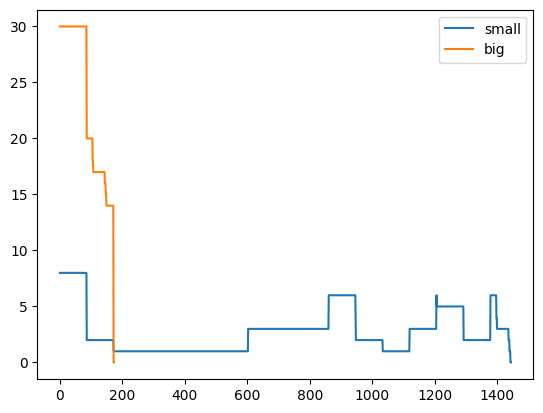

In [71]:
plt.plot(df_service_small.tasks_active, label="small")
plt.plot(df_service_big.tasks_active, label="big")


plt.legend()
plt.plot()

### Performance

- Graph Greenifier can plot performance metrics, such as average cpu utilization

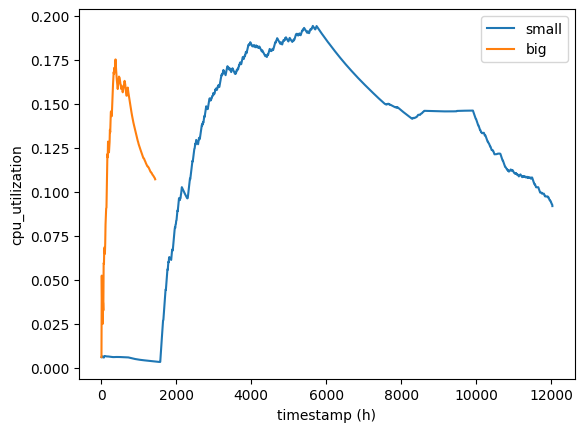

In [72]:
def plotHost(df_host, column, aggregation_method, label, window_size=1000):
    if aggregation_method not in ["mean", "sum"]:
        raise ValueError(f"incorrect aggregation method provided: {aggregation_method}, please pick on of [mean, sum]")

    df_agg = df_host.groupby("timestamp")[[column]].agg(aggregation_method)

    plt.plot(df_agg.index/1000/60/60, df_agg.rolling(window_size, min_periods=1).mean(), label=label)
    plt.xlabel("timestamp (h)")
    plt.ylabel(column)

    plt.legend()


plotHost(df_host_small, "cpu_utilization", "mean", "small")
plotHost(df_host_big, "cpu_utilization", "mean", "big")

### Sustainability

- All sustainability metrics can also be plotted

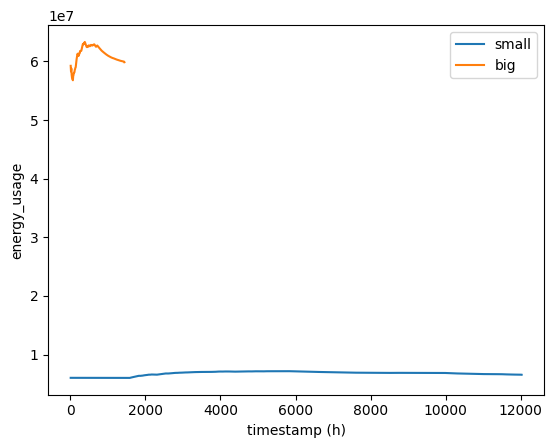

In [73]:
utils.plotHosts(df_power_small, "energy_usage", "sum", "small")
utils.plotHosts(df_power_big, "energy_usage", "sum", "big")